In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# class definition for the core structure
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass


    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create object instance from neural network class
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [3]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs 
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99 
        n.train(inputs, targets)
        pass
    pass

In [4]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs representing the pixels
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    #COMMENTED: 
    #print('outputs after query are:\n',outputs)
    # the index of the highest value corresponds to the label
    # numpy.argmax() returns the indices of the maximum values along an axis
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

The number 7 was corrctly detected with a score of [0.99395445]
The number 2 was corrctly detected with a score of [0.98159523]
The number 1 was corrctly detected with a score of [0.99061583]
The number 0 was corrctly detected with a score of [0.99872128]
The number 4 was corrctly detected with a score of [0.99059464]
The number 1 was corrctly detected with a score of [0.9904314]
The number 4 was corrctly detected with a score of [0.98109475]
The number 9 was corrctly detected with a score of [0.99579881]
The number 5 was corrctly detected with a score of [0.43120293]
The number 9 was corrctly detected with a score of [0.98781819]
The number 0 was corrctly detected with a score of [0.9962797]
The number 6 was corrctly detected with a score of [0.98101596]
The number 9 was corrctly detected with a score of [0.9924646]
The number 0 was corrctly detected with a score of [0.99594345]
The number 1 was corrctly detected with a score of [0.99273103]
The number 5 was corrctly detected with a s

The number 8 was corrctly detected with a score of [0.94268744]
The number 1 was corrctly detected with a score of [0.99698971]
The number 0 was corrctly detected with a score of [0.99362116]
The number 5 was corrctly detected with a score of [0.95660799]
The number 1 was corrctly detected with a score of [0.99435926]
The number 3 was corrctly detected with a score of [0.94769749]
The number 1 was corrctly detected with a score of [0.98908794]
The number 5 was corrctly detected with a score of [0.99881239]
The number 5 was corrctly detected with a score of [0.52078004]
The number 6 was corrctly detected with a score of [0.97355163]
The number 1 was corrctly detected with a score of [0.98353761]
The number 8 was corrctly detected with a score of [0.99443023]
The number 5 was corrctly detected with a score of [0.99968059]
The number 1 was corrctly detected with a score of [0.95022158]
The number 7 was corrctly detected with a score of [0.81218092]
The number 9 was corrctly detected with 

The number 1 was corrctly detected with a score of [0.98311121]
The number 1 was corrctly detected with a score of [0.99511851]
The number 6 was corrctly detected with a score of [0.99808911]
The number 4 was corrctly detected with a score of [0.97815124]
The number 7 was corrctly detected with a score of [0.85971222]
The number 1 was corrctly detected with a score of [0.99130883]
The number 9 was corrctly detected with a score of [0.99605263]
The number 4 was corrctly detected with a score of [0.96030849]
The number 2 was corrctly detected with a score of [0.99300276]
The number 4 was corrctly detected with a score of [0.991393]
The number 1 was corrctly detected with a score of [0.9938658]
The number 5 was corrctly detected with a score of [0.99891929]
The number 5 was corrctly detected with a score of [0.98739931]
The number 3 was corrctly detected with a score of [0.99702619]
The number 8 was corrctly detected with a score of [0.92684023]
The number 3 was corrctly detected with a s

The number 7 was corrctly detected with a score of [0.99784358]
The number 5 was corrctly detected with a score of [0.99891131]
The number 8 was corrctly detected with a score of [0.98690269]
The number 2 was corrctly detected with a score of [0.97942535]
The number 6 was corrctly detected with a score of [0.98419094]
The number 2 was corrctly detected with a score of [0.97880978]
The number 2 was corrctly detected with a score of [0.95633987]
The number 5 was corrctly detected with a score of [0.99812304]
The number 6 was corrctly detected with a score of [0.96603044]
The number 5 was corrctly detected with a score of [0.86970519]
The number 0 was corrctly detected with a score of [0.99325865]
The number 9 was corrctly detected with a score of [0.99375552]
The number 2 was corrctly detected with a score of [0.99249378]
The number 4 was corrctly detected with a score of [0.99931318]
The number 3 was corrctly detected with a score of [0.98779842]
The number 3 was corrctly detected with 

The number 1 was corrctly detected with a score of [0.9971208]
The number 1 was corrctly detected with a score of [0.99623264]
The number 1 was corrctly detected with a score of [0.99367964]
The number 3 was corrctly detected with a score of [0.99499144]
The number 1 was corrctly detected with a score of [0.97925408]
The number 2 was corrctly detected with a score of [0.54244973]
The number 3 was corrctly detected with a score of [0.9994886]
The number 0 was corrctly detected with a score of [0.99428709]
The number 2 was corrctly detected with a score of [0.99115349]
The number 0 was corrctly detected with a score of [0.9750789]
The number 1 was corrctly detected with a score of [0.99026768]
The number 3 was corrctly detected with a score of [0.99904993]
The number 5 was corrctly detected with a score of [0.99885141]
The number 5 was corrctly detected with a score of [0.96257988]
The number 7 was corrctly detected with a score of [0.96768816]
The number 4 was corrctly detected with a s

The number 8 was corrctly detected with a score of [0.88643383]
The number 3 was corrctly detected with a score of [0.99678632]
The number 2 was corrctly detected with a score of [0.97468058]
The number 2 was corrctly detected with a score of [0.97213668]
The number 1 was corrctly detected with a score of [0.94444579]
The number 0 was corrctly detected with a score of [0.98620868]
The number 4 was corrctly detected with a score of [0.99634475]
The number 2 was corrctly detected with a score of [0.57105032]
The number 9 was corrctly detected with a score of [0.99026892]
The number 2 was corrctly detected with a score of [0.99289432]
The number 4 was corrctly detected with a score of [0.99833225]
The number 3 was corrctly detected with a score of [0.91306946]
The number 7 was corrctly detected with a score of [0.99567656]
The number 9 was corrctly detected with a score of [0.99490864]
The number 1 was corrctly detected with a score of [0.99696255]
The number 5 was corrctly detected with 

The number 6 was corrctly detected with a score of [0.94886006]
The number 1 was corrctly detected with a score of [0.9933092]
The number 1 was corrctly detected with a score of [0.99700897]
The number 8 was corrctly detected with a score of [0.9886327]
The number 9 was corrctly detected with a score of [0.99653907]
The number 3 was corrctly detected with a score of [0.99303115]
The number 4 was corrctly detected with a score of [0.98689821]
The number 0 was corrctly detected with a score of [0.97962293]
The number 7 was corrctly detected with a score of [0.998764]
The number 9 was corrctly detected with a score of [0.94839152]
The number 6 was corrctly detected with a score of [0.99552419]
The number 9 was incorrctly detected with a score of [0.20851921], was 4
The number 1 was corrctly detected with a score of [0.98957067]
The number 4 was corrctly detected with a score of [0.91135232]
The number 1 was corrctly detected with a score of [0.99591365]
The number 3 was corrctly detected 

The number 4 was corrctly detected with a score of [0.98877724]
The number 3 was corrctly detected with a score of [0.97757398]
The number 8 was corrctly detected with a score of [0.70935131]
The number 0 was corrctly detected with a score of [0.9935737]
The number 6 was corrctly detected with a score of [0.99054678]
The number 2 was corrctly detected with a score of [0.99660145]
The number 1 was corrctly detected with a score of [0.993315]
The number 6 was corrctly detected with a score of [0.9967636]
The number 5 was corrctly detected with a score of [0.97713803]
The number 3 was corrctly detected with a score of [0.64798937]
The number 9 was corrctly detected with a score of [0.9919009]
The number 1 was corrctly detected with a score of [0.9938652]
The number 9 was corrctly detected with a score of [0.98699428]
The number 3 was corrctly detected with a score of [0.97658722]
The number 2 was corrctly detected with a score of [0.95108274]
The number 1 was corrctly detected with a scor

The number 9 was corrctly detected with a score of [0.99636819]
The number 4 was corrctly detected with a score of [0.78087335]
The number 8 was corrctly detected with a score of [0.99660452]
The number 3 was corrctly detected with a score of [0.99789017]
The number 6 was corrctly detected with a score of [0.99464556]
The number 9 was corrctly detected with a score of [0.98402431]
The number 5 was corrctly detected with a score of [0.99931243]
The number 9 was corrctly detected with a score of [0.98961678]
The number 6 was corrctly detected with a score of [0.98728228]
The number 2 was corrctly detected with a score of [0.88288577]
The number 4 was corrctly detected with a score of [0.99972593]
The number 6 was corrctly detected with a score of [0.99261527]
The number 7 was corrctly detected with a score of [0.99384105]
The number 7 was corrctly detected with a score of [0.99105542]
The number 0 was corrctly detected with a score of [0.98421753]
The number 6 was corrctly detected with 

The number 1 was incorrctly detected with a score of [0.78041721], was 7
The number 2 was corrctly detected with a score of [0.93215862]
The number 9 was corrctly detected with a score of [0.98907802]
The number 4 was corrctly detected with a score of [0.99695541]
The number 9 was corrctly detected with a score of [0.99331459]
The number 1 was corrctly detected with a score of [0.99339079]
The number 2 was corrctly detected with a score of [0.9882667]
The number 8 was corrctly detected with a score of [0.99633253]
The number 6 was corrctly detected with a score of [0.51466633]
The number 0 was corrctly detected with a score of [0.98687836]
The number 7 was corrctly detected with a score of [0.73355689]
The number 0 was corrctly detected with a score of [0.99790054]
The number 9 was corrctly detected with a score of [0.71340142]
The number 1 was corrctly detected with a score of [0.9759773]
The number 1 was corrctly detected with a score of [0.98115592]
The number 5 was incorrctly detec

The number 8 was corrctly detected with a score of [0.97385446]
The number 6 was corrctly detected with a score of [0.99278857]
The number 8 was corrctly detected with a score of [0.95394182]
The number 5 was corrctly detected with a score of [0.96783905]
The number 3 was incorrctly detected with a score of [0.70493468], was 5
The number 3 was corrctly detected with a score of [0.52542451]
The number 9 was corrctly detected with a score of [0.99768063]
The number 4 was corrctly detected with a score of [0.99508149]
The number 9 was corrctly detected with a score of [0.8594222]
The number 2 was corrctly detected with a score of [0.94797538]
The number 5 was corrctly detected with a score of [0.84292826]
The number 1 was corrctly detected with a score of [0.98805414]
The number 5 was corrctly detected with a score of [0.96246284]
The number 1 was corrctly detected with a score of [0.99376508]
The number 4 was corrctly detected with a score of [0.44121935]
The number 4 was corrctly detect

The number 5 was corrctly detected with a score of [0.99895132]
The number 4 was corrctly detected with a score of [0.6746135]
The number 3 was corrctly detected with a score of [0.99065368]
The number 8 was corrctly detected with a score of [0.94467278]
The number 4 was corrctly detected with a score of [0.90669949]
The number 6 was corrctly detected with a score of [0.99567035]
The number 6 was corrctly detected with a score of [0.99018992]
The number 2 was corrctly detected with a score of [0.99344192]
The number 7 was corrctly detected with a score of [0.98210303]
The number 9 was corrctly detected with a score of [0.99756571]
The number 5 was corrctly detected with a score of [0.9851686]
The number 1 was corrctly detected with a score of [0.98713101]
The number 3 was corrctly detected with a score of [0.99902297]
The number 2 was corrctly detected with a score of [0.99752338]
The number 4 was corrctly detected with a score of [0.92500521]
The number 3 was corrctly detected with a 

The number 9 was corrctly detected with a score of [0.98178761]
The number 7 was corrctly detected with a score of [0.99202942]
The number 4 was corrctly detected with a score of [0.99688558]
The number 2 was corrctly detected with a score of [0.99815221]
The number 0 was corrctly detected with a score of [0.99509316]
The number 9 was corrctly detected with a score of [0.98456619]
The number 0 was corrctly detected with a score of [0.99534747]
The number 1 was corrctly detected with a score of [0.98842129]
The number 5 was corrctly detected with a score of [0.99650207]
The number 8 was corrctly detected with a score of [0.93086903]
The number 8 was corrctly detected with a score of [0.93599208]
The number 0 was corrctly detected with a score of [0.99892349]
The number 2 was corrctly detected with a score of [0.99632771]
The number 7 was corrctly detected with a score of [0.98228352]
The number 8 was corrctly detected with a score of [0.98104487]
The number 4 was corrctly detected with 

The number 4 was corrctly detected with a score of [0.48952463]
The number 5 was corrctly detected with a score of [0.99836916]
The number 6 was corrctly detected with a score of [0.99214513]
The number 7 was corrctly detected with a score of [0.87211651]
The number 8 was corrctly detected with a score of [0.99969623]
The number 0 was corrctly detected with a score of [0.99367627]
The number 1 was corrctly detected with a score of [0.98672734]
The number 2 was corrctly detected with a score of [0.99539224]
The number 3 was corrctly detected with a score of [0.99870803]
The number 4 was corrctly detected with a score of [0.94344475]
The number 5 was corrctly detected with a score of [0.97826057]
The number 6 was corrctly detected with a score of [0.99262762]
The number 7 was corrctly detected with a score of [0.87747823]
The number 8 was corrctly detected with a score of [0.99519689]
The number 9 was corrctly detected with a score of [0.99557308]
The number 8 was corrctly detected with 

The number 3 was corrctly detected with a score of [0.99964092]
The number 3 was corrctly detected with a score of [0.99936348]
The number 0 was corrctly detected with a score of [0.99485105]
The number 2 was corrctly detected with a score of [0.97167486]
The number 5 was corrctly detected with a score of [0.93035103]
The number 5 was corrctly detected with a score of [0.95272387]
The number 6 was corrctly detected with a score of [0.99807332]
The number 6 was corrctly detected with a score of [0.96497015]
The number 3 was corrctly detected with a score of [0.88104547]
The number 5 was corrctly detected with a score of [0.37072529]
The number 4 was incorrctly detected with a score of [0.36050007], was 2
The number 5 was corrctly detected with a score of [0.41260264]
The number 9 was corrctly detected with a score of [0.98347209]
The number 9 was corrctly detected with a score of [0.99592722]
The number 8 was corrctly detected with a score of [0.96435768]
The number 4 was corrctly detec

The number 5 was corrctly detected with a score of [0.94729842]
The number 1 was corrctly detected with a score of [0.99175481]
The number 3 was corrctly detected with a score of [0.99838906]
The number 7 was corrctly detected with a score of [0.78090644]
The number 6 was corrctly detected with a score of [0.98413065]
The number 9 was corrctly detected with a score of [0.93466603]
The number 3 was corrctly detected with a score of [0.98969951]
The number 0 was corrctly detected with a score of [0.99371417]
The number 2 was corrctly detected with a score of [0.65100287]
The number 2 was corrctly detected with a score of [0.76062583]
The number 0 was corrctly detected with a score of [0.99895939]
The number 1 was corrctly detected with a score of [0.99779556]
The number 2 was corrctly detected with a score of [0.97261058]
The number 3 was corrctly detected with a score of [0.99932179]
The number 4 was corrctly detected with a score of [0.99613209]
The number 5 was corrctly detected with 

The number 6 was corrctly detected with a score of [0.98926015]
The number 2 was corrctly detected with a score of [0.99517392]
The number 9 was corrctly detected with a score of [0.98699788]
The number 4 was corrctly detected with a score of [0.93336254]
The number 7 was corrctly detected with a score of [0.99477221]
The number 0 was corrctly detected with a score of [0.9953664]
The number 2 was corrctly detected with a score of [0.98871729]
The number 3 was corrctly detected with a score of [0.94434699]
The number 4 was corrctly detected with a score of [0.98900627]
The number 0 was corrctly detected with a score of [0.99206362]
The number 0 was corrctly detected with a score of [0.98194033]
The number 8 was corrctly detected with a score of [0.96410563]
The number 8 was corrctly detected with a score of [0.28113498]
The number 8 was corrctly detected with a score of [0.9288701]
The number 5 was corrctly detected with a score of [0.97872108]
The number 1 was corrctly detected with a 

The number 3 was corrctly detected with a score of [0.53141493]
The number 6 was corrctly detected with a score of [0.98293707]
The number 0 was corrctly detected with a score of [0.99829631]
The number 7 was corrctly detected with a score of [0.62108859]
The number 2 was corrctly detected with a score of [0.6030302]
The number 4 was corrctly detected with a score of [0.99055559]
The number 1 was corrctly detected with a score of [0.91864176]
The number 7 was corrctly detected with a score of [0.67230921]
The number 0 was corrctly detected with a score of [0.99025086]
The number 6 was corrctly detected with a score of [0.94683007]
The number 9 was incorrctly detected with a score of [0.74010859], was 7
The number 1 was corrctly detected with a score of [0.89739277]
The number 2 was corrctly detected with a score of [0.78097709]
The number 5 was corrctly detected with a score of [0.92672954]
The number 8 was corrctly detected with a score of [0.91676496]
The number 1 was corrctly detect

The number 1 was corrctly detected with a score of [0.987623]
The number 3 was corrctly detected with a score of [0.9958764]
The number 1 was corrctly detected with a score of [0.99370809]
The number 7 was corrctly detected with a score of [0.99838421]
The number 9 was corrctly detected with a score of [0.99338169]
The number 6 was corrctly detected with a score of [0.98604443]
The number 2 was corrctly detected with a score of [0.99428884]
The number 0 was corrctly detected with a score of [0.99051754]
The number 9 was corrctly detected with a score of [0.84646407]
The number 1 was corrctly detected with a score of [0.98711296]
The number 7 was corrctly detected with a score of [0.98936868]
The number 3 was corrctly detected with a score of [0.99700491]
The number 3 was corrctly detected with a score of [0.98189711]
The number 9 was corrctly detected with a score of [0.98138928]
The number 1 was corrctly detected with a score of [0.98848964]
The number 6 was corrctly detected with a s

The number 0 was corrctly detected with a score of [0.99778675]
The number 6 was corrctly detected with a score of [0.99611934]
The number 1 was corrctly detected with a score of [0.99508749]
The number 5 was corrctly detected with a score of [0.99742665]
The number 7 was corrctly detected with a score of [0.9681431]
The number 4 was corrctly detected with a score of [0.99688729]
The number 6 was corrctly detected with a score of [0.98040532]
The number 1 was corrctly detected with a score of [0.992295]
The number 2 was corrctly detected with a score of [0.99147781]
The number 5 was corrctly detected with a score of [0.99748689]
The number 0 was corrctly detected with a score of [0.99057351]
The number 7 was corrctly detected with a score of [0.9784319]
The number 9 was corrctly detected with a score of [0.984626]
The number 9 was corrctly detected with a score of [0.9986202]
The number 0 was corrctly detected with a score of [0.99857106]
The number 3 was corrctly detected with a score

The number 1 was corrctly detected with a score of [0.96726891]
The number 9 was corrctly detected with a score of [0.97098103]
The number 3 was corrctly detected with a score of [0.9837628]
The number 9 was corrctly detected with a score of [0.99545339]
The number 6 was corrctly detected with a score of [0.99508133]
The number 1 was corrctly detected with a score of [0.99040861]
The number 7 was corrctly detected with a score of [0.86609698]
The number 2 was corrctly detected with a score of [0.87181076]
The number 4 was corrctly detected with a score of [0.99905411]
The number 4 was corrctly detected with a score of [0.99466775]
The number 5 was corrctly detected with a score of [0.99766414]
The number 7 was corrctly detected with a score of [0.6371518]
The number 0 was corrctly detected with a score of [0.99820422]
The number 0 was corrctly detected with a score of [0.99791768]
The number 1 was corrctly detected with a score of [0.98202235]
The number 6 was corrctly detected with a 

The number 4 was corrctly detected with a score of [0.95226299]
The number 7 was corrctly detected with a score of [0.99319272]
The number 8 was corrctly detected with a score of [0.99850774]
The number 9 was corrctly detected with a score of [0.99189953]
The number 2 was corrctly detected with a score of [0.96163169]
The number 9 was corrctly detected with a score of [0.99285615]
The number 3 was corrctly detected with a score of [0.98647674]
The number 9 was corrctly detected with a score of [0.99215414]
The number 3 was corrctly detected with a score of [0.97244148]
The number 0 was corrctly detected with a score of [0.99555708]
The number 0 was corrctly detected with a score of [0.99676076]
The number 1 was corrctly detected with a score of [0.98988259]
The number 0 was corrctly detected with a score of [0.99844798]
The number 4 was corrctly detected with a score of [0.99747924]
The number 2 was corrctly detected with a score of [0.9773258]
The number 6 was corrctly detected with a

The number 6 was corrctly detected with a score of [0.99281167]
The number 9 was corrctly detected with a score of [0.99133648]
The number 0 was corrctly detected with a score of [0.99345324]
The number 4 was corrctly detected with a score of [0.997196]
The number 1 was corrctly detected with a score of [0.99624633]
The number 9 was corrctly detected with a score of [0.99777517]
The number 3 was corrctly detected with a score of [0.99104445]
The number 8 was corrctly detected with a score of [0.96682488]
The number 4 was corrctly detected with a score of [0.99573143]
The number 4 was corrctly detected with a score of [0.99805234]
The number 7 was corrctly detected with a score of [0.9937106]
The number 0 was corrctly detected with a score of [0.9988888]
The number 1 was corrctly detected with a score of [0.99454318]
The number 9 was corrctly detected with a score of [0.99607457]
The number 2 was corrctly detected with a score of [0.98096889]
The number 8 was corrctly detected with a sc

The number 2 was corrctly detected with a score of [0.99363085]
The number 3 was corrctly detected with a score of [0.99652737]
The number 4 was corrctly detected with a score of [0.99624078]
The number 5 was corrctly detected with a score of [0.99901214]
The number 6 was corrctly detected with a score of [0.93148076]
The number 7 was corrctly detected with a score of [0.97900619]
The number 8 was corrctly detected with a score of [0.99088328]
The number 9 was corrctly detected with a score of [0.96399581]
The number 0 was corrctly detected with a score of [0.98948252]
The number 1 was corrctly detected with a score of [0.98476109]
The number 2 was corrctly detected with a score of [0.92063135]
The number 3 was corrctly detected with a score of [0.97919458]
The number 4 was corrctly detected with a score of [0.98653296]
The number 5 was corrctly detected with a score of [0.99973637]
The number 6 was corrctly detected with a score of [0.9135458]
The number 7 was corrctly detected with a

The number 0 was incorrctly detected with a score of [0.49024661], was 2
The number 9 was corrctly detected with a score of [0.97989064]
The number 0 was incorrctly detected with a score of [0.99367576], was 5
The number 7 was corrctly detected with a score of [0.92439996]
The number 1 was corrctly detected with a score of [0.99161861]
The number 7 was corrctly detected with a score of [0.97416012]
The number 1 was corrctly detected with a score of [0.99209285]
The number 6 was corrctly detected with a score of [0.96067105]
The number 6 was corrctly detected with a score of [0.97531209]
The number 5 was corrctly detected with a score of [0.724141]
The number 6 was corrctly detected with a score of [0.9977038]
The number 0 was incorrctly detected with a score of [0.38587692], was 2
The number 8 was corrctly detected with a score of [0.75570286]
The number 7 was corrctly detected with a score of [0.63193375]
The number 6 was corrctly detected with a score of [0.41351053]
The number 4 was

The number 5 was corrctly detected with a score of [0.99316706]
The number 6 was corrctly detected with a score of [0.99719532]
The number 7 was corrctly detected with a score of [0.90351462]
The number 8 was corrctly detected with a score of [0.9800774]
The number 0 was corrctly detected with a score of [0.99591439]
The number 1 was corrctly detected with a score of [0.99328819]
The number 2 was corrctly detected with a score of [0.95829308]
The number 3 was corrctly detected with a score of [0.96709616]
The number 4 was corrctly detected with a score of [0.99819857]
The number 7 was corrctly detected with a score of [0.93793051]
The number 8 was corrctly detected with a score of [0.9939433]
The number 9 was corrctly detected with a score of [0.98326702]
The number 7 was corrctly detected with a score of [0.87894012]
The number 8 was corrctly detected with a score of [0.99360129]
The number 6 was corrctly detected with a score of [0.88941484]
The number 4 was corrctly detected with a 

In [5]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print(scorecard_array.sum(),scorecard_array.size)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

9728 10000
performance =  0.9728


Learning rate 0.01, Performance: 0.9533
Learning rate 0.1, Performance: 0.9736
Learning rate 0.2, Performance: 0.9687
Learning rate 0.3, Performance: 0.9605
Learning rate 0.5, Performance: 0.9308
Learning rate 1.0, Performance: 0.8833


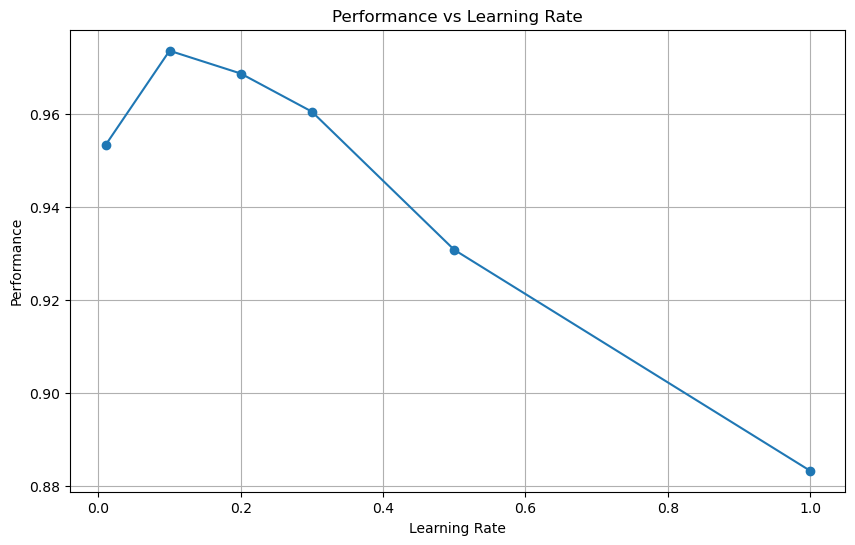

In [7]:
import matplotlib.pyplot as plt
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.5, 1.0]
epochs = 5

# Dictionary to store the performance of different learning rates
performance = {}

for lr in learning_rates:
    # Create instance of neural network with the current learning rate
    n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
    
    # Train the neural network
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99 
            n.train(inputs, targets)
    
    # Scorecard for how well the network performs, initially empty
    scorecard = []

    # Go through all the records in the test data set
    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = numpy.argmax(outputs)
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
    
    # Calculate the performance score, the fraction of correct answers
    performance[lr] = numpy.sum(scorecard) / len(scorecard)
    print(f"Learning rate {lr}, Performance: {performance[lr]}")

# Plot the performance for different learning rates
plt.figure(figsize=(10, 6))
plt.plot(list(performance.keys()), list(performance.values()), marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Performance')
plt.title('Performance vs Learning Rate')
plt.grid()
plt.show()

Learning rate 0.01, Performance: 0.9533
Learning rate 0.1, Performance: 0.972
Learning rate 0.12, Performance: 0.9739
Learning rate 0.15, Performance: 0.9694
Learning rate 0.2, Performance: 0.9699
Learning rate 0.3, Performance: 0.9581
Learning rate 0.5, Performance: 0.9366
Learning rate 1.0, Performance: 0.8528


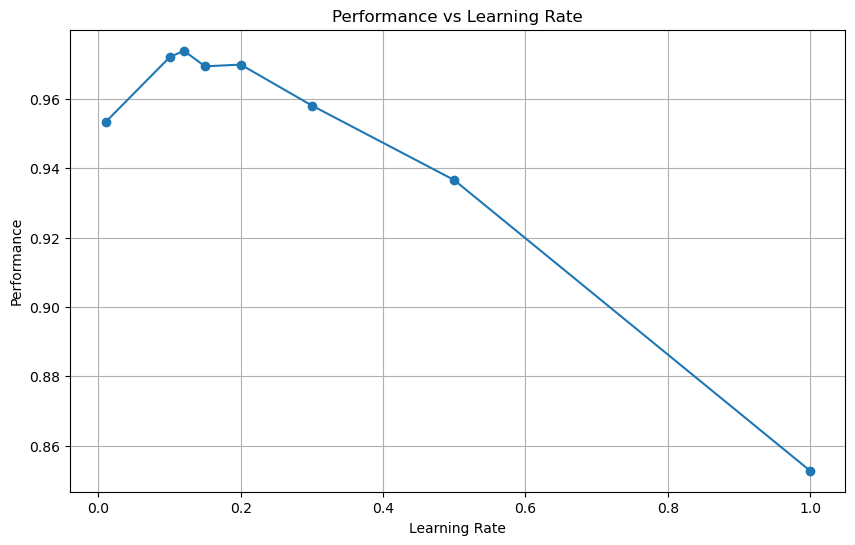

In [8]:
import matplotlib.pyplot as plt
import numpy

learning_rates = [0.01, 0.1, 0.12, 0.15, 0.2, 0.3, 0.5, 1.0]
epochs = 5

# Dictionary to store the performance of different learning rates
performance = {}

for lr in learning_rates:
    # Create instance of neural network with the current learning rate
    n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
    
    # Train the neural network
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99 
            n.train(inputs, targets)
    
    # Scorecard for how well the network performs, initially empty
    scorecard = []

    # Go through all the records in the test data set
    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = numpy.argmax(outputs)
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
    
    # Calculate the performance score, the fraction of correct answers
    performance[lr] = numpy.sum(scorecard) / len(scorecard)
    print(f"Learning rate {lr}, Performance: {performance[lr]}")

# Plot the performance for different learning rates
plt.figure(figsize=(10, 6))
plt.plot(list(performance.keys()), list(performance.values()), marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Performance')
plt.title('Performance vs Learning Rate')
plt.grid()
plt.show()


Learning rate 0.1, Epochs 1, Performance: 0.9567
Learning rate 0.1, Epochs 3, Performance: 0.97
Learning rate 0.1, Epochs 5, Performance: 0.9725
Learning rate 0.1, Epochs 10, Performance: 0.9755
Learning rate 0.1, Epochs 50, Performance: 0.9659
Learning rate 0.12, Epochs 1, Performance: 0.9576
Learning rate 0.12, Epochs 3, Performance: 0.9731
Learning rate 0.12, Epochs 5, Performance: 0.9728
Learning rate 0.12, Epochs 10, Performance: 0.9722
Learning rate 0.12, Epochs 50, Performance: 0.9588


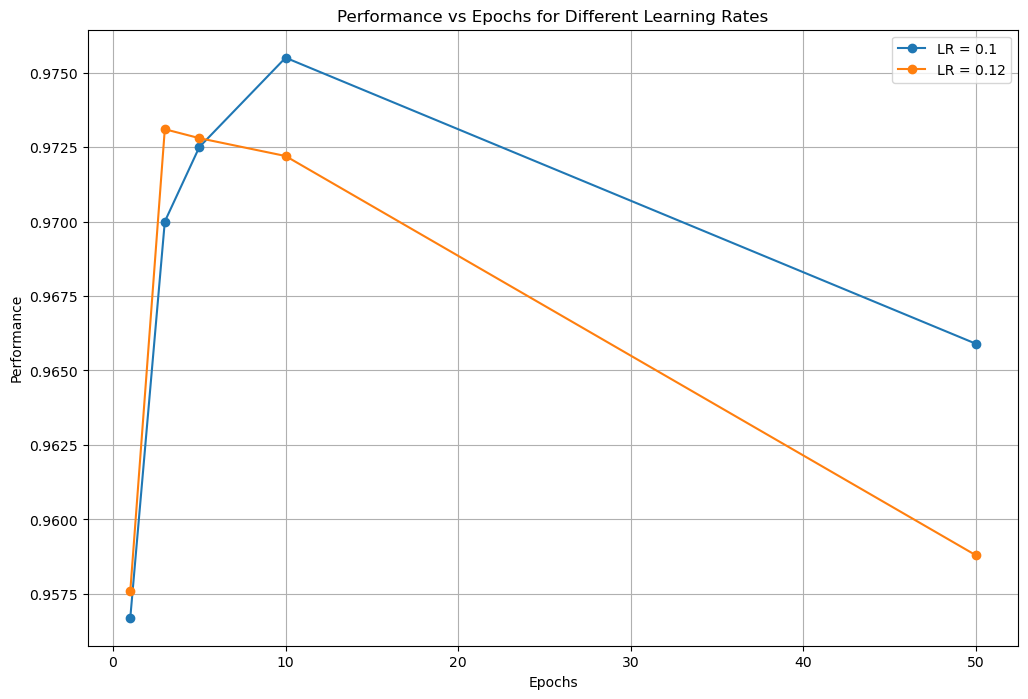

In [9]:


learning_rates = [0.1, 0.12]
epochs_list = [1, 3, 5, 10, 50]

# Dictionary to store the performance of different learning rates and epochs
performance = {}

for lr in learning_rates:
    performance[lr] = []
    for epochs in epochs_list:
        # Create instance of neural network with the current learning rate
        n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
        
        # Train the neural network
        for e in range(epochs):
            for record in training_data_list:
                all_values = record.split(',')
                inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
                targets = numpy.zeros(output_nodes) + 0.01
                targets[int(all_values[0])] = 0.99 
                n.train(inputs, targets)
        
        # Scorecard for how well the network performs, initially empty
        scorecard = []

        # Go through all the records in the test data set
        for record in test_data_list:
            all_values = record.split(',')
            correct_label = int(all_values[0])
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            outputs = n.query(inputs)
            label = numpy.argmax(outputs)
            if (label == correct_label):
                scorecard.append(1)
            else:
                scorecard.append(0)
        
        # Calculate the performance score, the fraction of correct answers
        performance[lr].append(numpy.sum(scorecard) / len(scorecard))
        print(f"Learning rate {lr}, Epochs {epochs}, Performance: {performance[lr][-1]}")

# Plot the performance for different learning rates and epochs
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    plt.plot(epochs_list, performance[lr], marker='o', label=f'LR = {lr}')

plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.title('Performance vs Epochs for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()


Hidden layer size 5, Performance: 0.6971, Training time: 42.02 seconds
Hidden layer size 50, Performance: 0.9584, Training time: 196.66 seconds
Hidden layer size 100, Performance: 0.9653, Training time: 240.00 seconds
Hidden layer size 500, Performance: 0.9771, Training time: 2445.30 seconds
Hidden layer size 1000, Performance: 0.9775, Training time: 3985.10 seconds


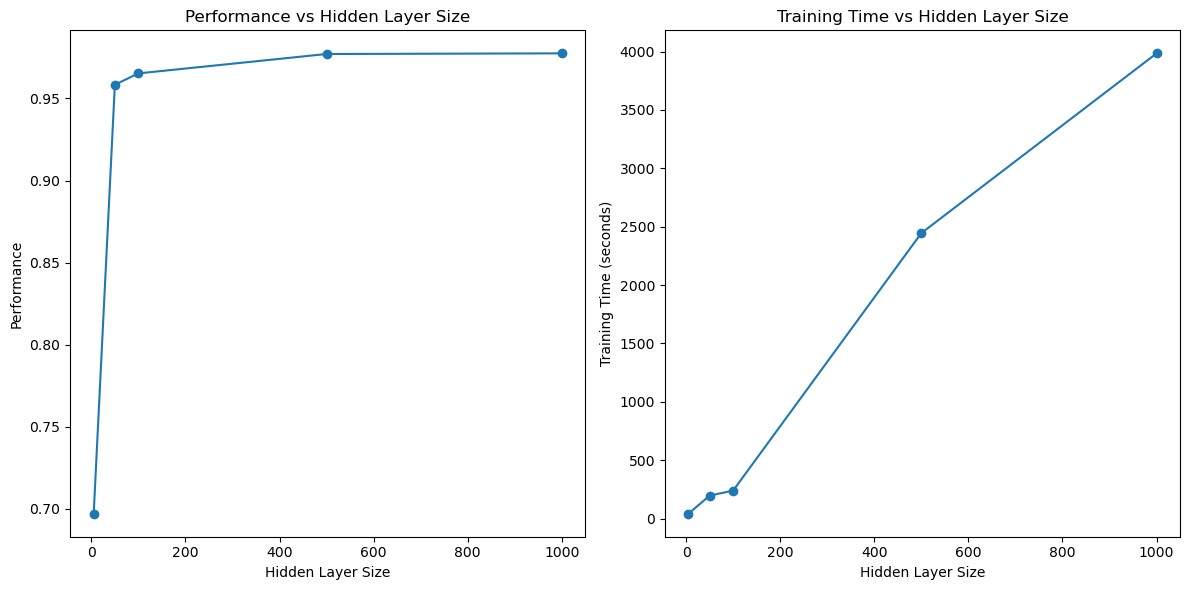

In [11]:
import pandas as pd
import time

طtraining_data = pd.read_csv('mnist_train.csv', header=None)
test_data = pd.read_csv('mnist_test.csv', header=None)

training_data_list = training_data.values.tolist()
test_data_list = test_data.values.tolist()

input_nodes = 784
output_nodes = 10
learning_rate = 0.1
epochs = 10

hidden_layer_sizes = [5, 50, 100, 500, 1000]
performance = {}
training_times = {}

for hidden_nodes in hidden_layer_sizes:
    n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    
    start_time = time.time()
    
    for e in range(epochs):
        for record in training_data_list:
            inputs = (numpy.asfarray(record[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(record[0])] = 0.99 
            n.train(inputs, targets)
    
    training_time = time.time() - start_time
    training_times[hidden_nodes] = training_time
    
    scorecard = []

    for record in test_data_list:
        correct_label = int(record[0])
        inputs = (numpy.asfarray(record[1:]) / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = numpy.argmax(outputs)
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
    
    performance[hidden_nodes] = numpy.sum(scorecard) / len(scorecard)
    print(f"Hidden layer size {hidden_nodes}, Performance: {performance[hidden_nodes]}, Training time: {training_time:.2f} seconds")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes, [performance[h] for h in hidden_layer_sizes], marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Performance')
plt.title('Performance vs Hidden Layer Size')

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes, [training_times[h] for h in hidden_layer_sizes], marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Hidden Layer Size')

plt.tight_layout()
plt.show()